## Model: Express Jet


In [1]:
import pandas as pd
import pandas_profiling

df = pd.read_csv('data/model_data_final_ExpressJet.csv')
df.profile_report()

In [2]:
df = pd.get_dummies(df, columns=['origin', 'destination'])
df.head()

,month,day_of_month,day_of_week,departure_time,delayed,origin_ORD,destination_ABE,destination_ACY,destination_ALB,destination_ATL,...,destination_SBN,destination_SCE,destination_SDF,destination_SGF,destination_STL,destination_SYR,destination_TUL,destination_TVC,destination_TYS,destination_XNA
0,1,1,5,13,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,5,12,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,5,12,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,5,12,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,5,15,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('delayed', axis=1), df['delayed'], test_size=0.2, random_state=42)

In [4]:
train_x.shape

(308456, 104)

In [5]:
test_x.shape

(77115, 104)

In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [7]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.7246709459897556

In [8]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)

In [9]:
roc_auc_score(test_y, probabilities[:, 1])

0.589426935939023

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[53063,  5257],
       [15975,  2820]])

In [11]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.9814909638554217

In [12]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.8770034046103538

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Text(0, 0.5, 'True Positive Rate')

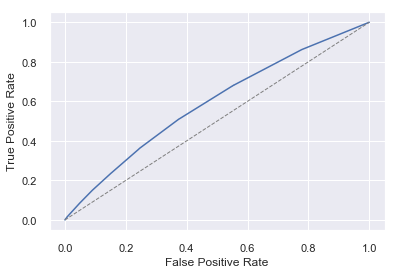

In [14]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [15]:
def predict_delay(departure_date_time, origin, destination):
    from datetime import datetime

    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%m/%d/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour

    origin = origin.upper()
    destination = destination.upper()

    input = [{  'month': month,
                'day': day,
                'day_of_week': day_of_week,
                'departure_time': hour,
                'origin_ORD': 1 if origin == 'ORD' else 0,
                'destination_ABE' : 1 if destination == 'ABE' else 0,
                'destination_ACY' : 1 if destination == 'ACY' else 0,
                'destination_ALB' : 1 if destination == 'ALB' else 0,
                'destination_ATL' : 1 if destination == 'ATL' else 0,
                'destination_ATW' : 1 if destination == 'ATW' else 0,
                'destination_AUS' : 1 if destination == 'AUS' else 0,
                'destination_AVP' : 1 if destination == 'AVP' else 0,
                'destination_AZO' : 1 if destination == 'AZO' else 0,
                'destination_BDL' : 1 if destination == 'BDL' else 0,
                'destination_BHM' : 1 if destination == 'BHM' else 0,
                'destination_BIL' : 1 if destination == 'BIL' else 0,
                'destination_BIS' : 1 if destination == 'BIS' else 0,
                'destination_BNA' : 1 if destination == 'BNA' else 0,
                'destination_BTV' : 1 if destination == 'BTV' else 0,
                'destination_BUF' : 1 if destination == 'BUF' else 0,
                'destination_BWI' : 1 if destination == 'BWI' else 0,
                'destination_CAE' : 1 if destination == 'CAE' else 0,
                'destination_CAK' : 1 if destination == 'CAK' else 0,
                'destination_CHA' : 1 if destination == 'CHA' else 0,
                'destination_CHS' : 1 if destination == 'CHS' else 0,
                'destination_CID' : 1 if destination == 'CID' else 0,
                'destination_CLE' : 1 if destination == 'CLE' else 0,
                'destination_CLT' : 1 if destination == 'CLT' else 0,
                'destination_CMH' : 1 if destination == 'CMH' else 0,
                'destination_COS' : 1 if destination == 'COS' else 0,
                'destination_COU' : 1 if destination == 'COU' else 0,
                'destination_CRW' : 1 if destination == 'CRW' else 0,
                'destination_CVG' : 1 if destination == 'CVG' else 0,
                'destination_CWA' : 1 if destination == 'CWA' else 0,
                'destination_DAY' : 1 if destination == 'DAY' else 0,
                'destination_DCA' : 1 if destination == 'DCA' else 0,
                'destination_DEN' : 1 if destination == 'DEN' else 0,
                'destination_DFW' : 1 if destination == 'DFW' else 0,
                'destination_DSM' : 1 if destination == 'DSM' else 0,
                'destination_DTW' : 1 if destination == 'DTW' else 0,
                'destination_ELM' : 1 if destination == 'ELM' else 0,
                'destination_ELP' : 1 if destination == 'ELP' else 0,
                'destination_ERI' : 1 if destination == 'ERI' else 0,
                'destination_EVV' : 1 if destination == 'EVV' else 0,
                'destination_EWR' : 1 if destination == 'EWR' else 0,
                'destination_FAR' : 1 if destination == 'FAR' else 0,
                'destination_FNT' : 1 if destination == 'FNT' else 0,
                'destination_FOE' : 1 if destination == 'FOE' else 0,
                'destination_FSD' : 1 if destination == 'FSD' else 0,
                'destination_GRB' : 1 if destination == 'GRB' else 0,
                'destination_GRR' : 1 if destination == 'GRR' else 0,
                'destination_GSO' : 1 if destination == 'GSO' else 0,
                'destination_GSP' : 1 if destination == 'GSP' else 0,
                'destination_HPN' : 1 if destination == 'HPN' else 0,
                'destination_HSV' : 1 if destination == 'HSV' else 0,
                'destination_IAD' : 1 if destination == 'IAD' else 0,
                'destination_IAH' : 1 if destination == 'IAH' else 0,
                'destination_ICT' : 1 if destination == 'ICT' else 0,
                'destination_IND' : 1 if destination == 'IND' else 0,
                'destination_JAN' : 1 if destination == 'JAN' else 0,
                'destination_JAX' : 1 if destination == 'JAX' else 0,
                'destination_LAN' : 1 if destination == 'LAN' else 0,
                'destination_LEX' : 1 if destination == 'LEX' else 0,
                'destination_LIT' : 1 if destination == 'LIT' else 0,
                'destination_LNK' : 1 if destination == 'LNK' else 0,
                'destination_MBS' : 1 if destination == 'MBS' else 0,
                'destination_MCI' : 1 if destination == 'MCI' else 0,
                'destination_MDT' : 1 if destination == 'MDT' else 0,
                'destination_MEM' : 1 if destination == 'MEM' else 0,
                'destination_MHT' : 1 if destination == 'MHT' else 0,
                'destination_MKE' : 1 if destination == 'MKE' else 0,
                'destination_MLI' : 1 if destination == 'MLI' else 0,
                'destination_MOB' : 1 if destination == 'MOB' else 0,
                'destination_MSN' : 1 if destination == 'MSN' else 0,
                'destination_MSP' : 1 if destination == 'MSP' else 0,
                'destination_MSY' : 1 if destination == 'MSY' else 0,
                'destination_OKC' : 1 if destination == 'OKC' else 0,
                'destination_OMA' : 1 if destination == 'OMA' else 0,
                'destination_ORF' : 1 if destination == 'ORF' else 0,
                'destination_PHL' : 1 if destination == 'PHL' else 0,
                'destination_PIA' : 1 if destination == 'PIA' else 0,
                'destination_PIT' : 1 if destination == 'PIT' else 0,
                'destination_PNS' : 1 if destination == 'PNS' else 0,
                'destination_PVD' : 1 if destination == 'PVD' else 0,
                'destination_PWM' : 1 if destination == 'PWM' else 0,
                'destination_RAP' : 1 if destination == 'RAP' else 0,
                'destination_RDU' : 1 if destination == 'RDU' else 0,
                'destination_RIC' : 1 if destination == 'RIC' else 0,
                'destination_ROA' : 1 if destination == 'ROA' else 0,
                'destination_ROC' : 1 if destination == 'ROC' else 0,
                'destination_RST' : 1 if destination == 'RST' else 0,
                'destination_RSW' : 1 if destination == 'RSW' else 0,
                'destination_SAT' : 1 if destination == 'SAT' else 0,
                'destination_SAV' : 1 if destination == 'SAV' else 0,
                'destination_SBN' : 1 if destination == 'SBN' else 0,
                'destination_SCE' : 1 if destination == 'SCE' else 0,
                'destination_SDF' : 1 if destination == 'SDF' else 0,
                'destination_SGF' : 1 if destination == 'SGF' else 0,
                'destination_STL' : 1 if destination == 'STL' else 0,
                'destination_SYR' : 1 if destination == 'SYR' else 0,
                'destination_TUL' : 1 if destination == 'TUL' else 0,
                'destination_TVC' : 1 if destination == 'TVC' else 0,
                'destination_TYS' : 1 if destination == 'TYS' else 0,
                'destination_XNA' : 1 if destination == 'XNA' else 0 }]
                
    return model.predict_proba(pd.DataFrame(input))[0][0]

In [16]:
predict_delay('9/1/2018 21:45:00', 'ORD', 'TYS')

0.7

In [17]:
predict_delay('9/2/2018 21:45:00', 'ORD', 'TYS')

0.8

(0.0, 1.0)

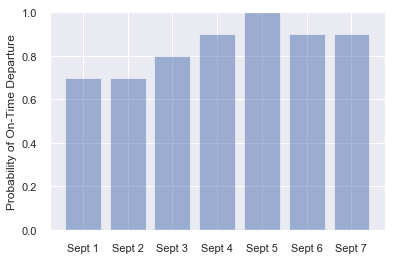

In [19]:
import numpy as np

labels = ('Sept 1', 'Sept 2', 'Sept 3', 'Sept 4', 'Sept 5', 'Sept 6', 'Sept 7')
values = (predict_delay('9/1/2019 15:30:00', 'ORD', 'TYS'),
          predict_delay('9/2/2019 15:30:00', 'ORD', 'TYS'),
          predict_delay('9/3/2019 15:30:00', 'ORD', 'TYS'),
          predict_delay('9/4/2019 15:30:00', 'ORD', 'TYS'),
          predict_delay('9/5/2019 15:30:00', 'ORD', 'TYS'),
          predict_delay('9/6/2019 15:30:00', 'ORD', 'TYS'),
          predict_delay('9/7/2019 15:30:00', 'ORD', 'TYS'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Departure')
plt.ylim((0.0, 1.0))